### A little investigation of Covid-19 data

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import register_matplotlib_converters
from scipy.stats import normaltest
register_matplotlib_converters()
%matplotlib inline

In [3]:
corona = pd.read_csv('covid_19_data.csv')


There are a lot of provinces in China so we limit our investigation to provinces with more than 100 cases of confirmed Covid-19.

In [4]:
# All provinces of china with confirmed cases  above 100 
corona_china = corona.loc[corona['Country/Region'] == 'Mainland China']
corona_china = corona_china[['Province/State', 'Confirmed']]
corona_china = corona_china.reset_index(drop=True)
corona_high = corona_china.loc[corona_china['Confirmed'] > 100]
corona_added = corona_high.groupby('Province/State').sum()


In [5]:
#Max value for each province and unique city array
maxvals = corona_high.groupby('Province/State').max()
cities = corona_high['Province/State'].unique()

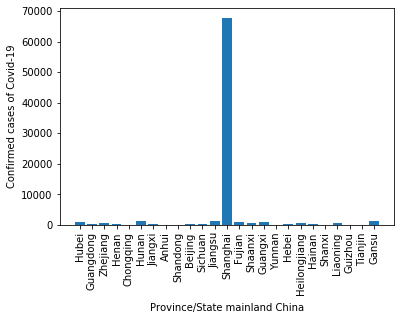

In [6]:
plt.bar(cities, maxvals['Confirmed'])
plt.xticks(cities, rotation='vertical')
plt.ylabel('Confirmed cases of Covid-19')
plt.xlabel('Province/State mainland China', labelpad=8)
plt.show()

In [7]:
# First we need just the data from Hubei
corona['Last Update'] = pd.to_datetime(corona['Last Update'])
corona_hubei = corona.loc[corona['Province/State'] == 'Hubei']


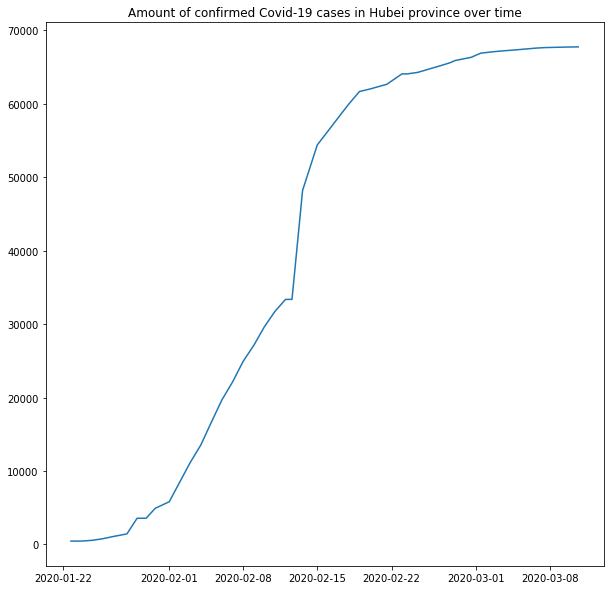

In [8]:
plt.figure(figsize=(10,10))
plt.title('Amount of confirmed Covid-19 cases in Hubei province over time')
plt.plot(corona_hubei['Last Update'], corona_hubei['Confirmed'])
plt.show()

Virus spread in Hubei seems to follow a sigmoid-like curve. This seems logical since it is fast spreading, but at some point the entire susceptible population has been infected or new safety measures take into effect and the amount of cases plateaus. Let's see if other provinces follow a similar pattern. Henan, Hunan and Anhui are next to Hubei, so they seem like suitable candidates.

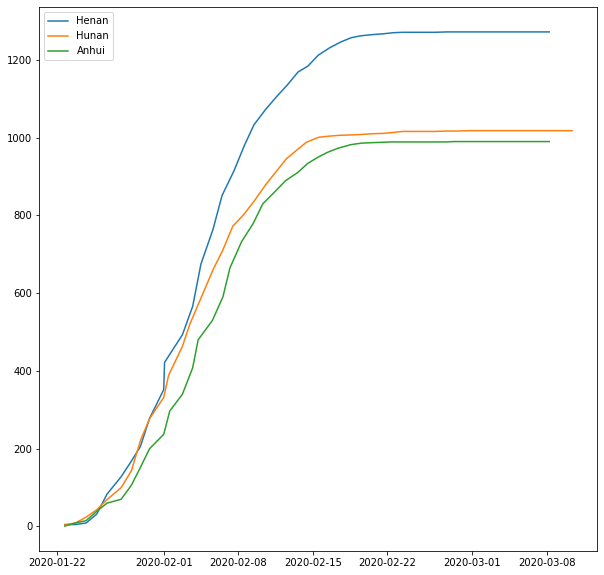

In [9]:
# First we need just the data from Henan
corona_henan = corona.loc[corona['Province/State'] == 'Henan']
corona_hunan = corona.loc[corona['Province/State'] == 'Hunan']
corona_anhui = corona.loc[corona['Province/State'] == 'Anhui']
plt.figure(figsize=(10,10))
plt.plot(corona_henan['Last Update'], corona_henan['Confirmed'], label='Henan')
plt.plot(corona_hunan['Last Update'], corona_hunan['Confirmed'], label='Hunan')
plt.plot(corona_anhui['Last Update'], corona_anhui['Confirmed'], label='Anhui')
plt.legend()
plt.show()

Similar sigmoid curve shapes like Hubei. Plateaus reached at different heights but around the same time. A quick google search shows these population sizes for the above provinces:

- Henan: 94 million
- Hunan: 67 million
- Anhui: 62 million

This difference in population size seems to scale with the plateau heights for the regions. So for now a hypothesis is forming that the amount of people being infected adjacent to the origin of the virus is mainly dependent on the population size.

In [10]:
#Create a list with the top 10 infected chinese provinces

uniques = corona_high.groupby('Province/State').max()
uniquename = corona_high['Province/State'].unique()
uniquename = np.sort(uniquename)

uniques['Place'] = uniquename

top10 = uniques.sort_values(by='Confirmed', ascending=False).head(10)
top10


,Confirmed,Place
Province/State,,
Hubei,67760.0,Hubei
Guangdong,1353.0,Guangdong
Henan,1272.0,Henan
Zhejiang,1215.0,Zhejiang
Hunan,1018.0,Hunan
Anhui,990.0,Anhui
Jiangxi,935.0,Jiangxi
Shandong,758.0,Shandong
Jiangsu,631.0,Jiangsu


I wanted to see if there was a relationship between the total population and the infected population. Therefore I googled the population sizes of the Provinces listed above and put them in a file.

In [11]:
population = pd.read_csv('Population.csv')
population

,Province,population
0,Hubei,58500000.0
1,Guangdong,113000000.0
2,Henan,109000000.0
3,Zheijang,57400000.0
4,Hunan,70000000.0
5,Anhui,75600000.0
6,Jiangxi,46500000.0
7,Shandong,100000000.0
8,Jiangsu,80400000.0
9,Chongqing,30000000.0


First we take the ratio between population size/confirmed cases. I left out Hubei, because that's where the virus originated, so it would be an outlier.

In [13]:
top10['Confirmed']

Province/State
Hubei        67760.0
Guangdong     1353.0
Henan         1272.0
Zhejiang      1215.0
Hunan         1018.0
Anhui          990.0
Jiangxi        935.0
Shandong       758.0
Jiangsu        631.0
Chongqing      576.0
Name: Confirmed, dtype: float64

In [39]:
# Divide every population size by its number of confirmed infections to give a list of ratios and then calculate the mean and std
# of these ratios
top = top10['Confirmed'].tolist()
ratios = population['population'] / top
mean = ratios.mean()
std = ratios.std()

# Performed a test to see if the data is normally distributed, just trying out
listratio = ratios.tolist()
normal = normaltest(listratio)

normal

NormaltestResult(statistic=0.21368109220904435, pvalue=0.8986689578324102)

The approach I was taking above somehow made sense in my head at first, but really the ratios don't tell me anything about the realtionship between population size and cases. All in all I practiced with a few functions I hadn't used before. Maybe plotting is more useful.

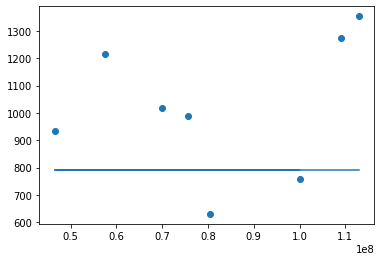

In [63]:
# Plotting population size vs infected cases. I left out Hubei since it was the epicenter, making it an outlier. 
# Got some simple linear fit parameters and fit a line to the points

pop = population['population'].tolist()
a, b = np.polyfit(pop[1:9], top[1:9], 1)

t = top[1:9]
y = [x * a for x in t]


plt.scatter(pop[1:9], top[1:9])
plt.plot(pop[1:9], y + b)
plt.show()




Needless to see there is no meaningfull relationship here....